In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import pickle

In [12]:
train_df= pd.read_csv('test.xls')
test_df = pd.read_csv('train.xls')

In [14]:
cols_target = [ 'toxic','severe_toxic','threat','obscene','insult','identity_hate']

In [16]:
print(test_df.isnull().any())

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool


In [18]:
data = test_df[cols_target]

<Axes: title={'center': 'correlation of features & targets'}>

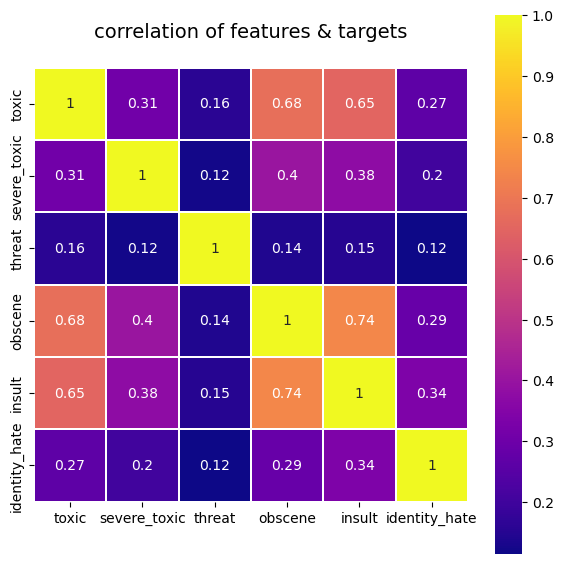

In [20]:
colomap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colomap,linecolor='white',annot=True)

In [22]:
def clean_text(text):
    text = text.lower()
    text=re.sub(r"what's","what is ",text)
    text = re.sub(r"\'s"," ",text)
    text=re.sub(r"\'ve","have",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"n't","not",text)
    text=re.sub(r"n't","not",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"\'re","are",text)
    text=re.sub(r"\'d","would",text)
    text=re.sub(r"'ll","will",text)
    text=re.sub(r"\'scuse","excuse",text)
    text=re.sub(' \w',' ',text)
    text=re.sub(' \s+',' ',text)
    text=text.strip(' ')
    return text

<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dadia\AppData\Local\Temp\ipykernel_4348\2781213244.py:14: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub(' \w',' ',text)
C:\Users\dadia\AppData\Local\Temp\ipykernel_4348\2781213244.py:15: SyntaxWarning: invalid escape sequence '\s'
  text=re.sub(' \s+',' ',text)


In [24]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))
test_df['comment_text']=test_df['comment_text'].map(lambda com : clean_text(com))

In [26]:
train_text = train_df['comment_text']
test_text = test_df['comment_text']
all_text = pd.concat([train_text, test_text])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
word_vect = CountVectorizer(strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1,1))
word_vect.fit(all_text)

CountVectorizer(stop_words='english', strip_accents='unicode',
                token_pattern='\\w{1,}')

In [30]:
train_features = word_vect.transform(train_text)
test_features = word_vect.transform(test_text)

In [32]:
pickle.dump(word_vect.vocabulary_,open('word_feats.pkl','wb'))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(C=16.0)

In [38]:
submission_binary =pd.read_csv('submission_binary.xls')

In [40]:
print(test_df.columns)

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


In [42]:
mapper = {}
for label in cols_target:
    mapper[label] = logreg
    filename = str(label+'_model.sav')
    print(filename)
    print('... processing {}'.format(label))
    y= test_df[label]
    mapper[label].fit(test_features,y)
    pickle.dump(mapper[label],open(filename,'wb'))
    y_pred_X=mapper[label].predict(test_features)
    print('Training accuracy is {}'.format(format(accuracy_score(y,y_pred_X))))
    test_y_prob = mapper[label].predict_proba(train_features)[:,1]
    submission_binary[label] = test_y_prob

toxic_model.sav
... processing toxic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9674878267354344
severe_toxic_model.sav
... processing severe_toxic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9922542316586347
threat_model.sav
... processing threat


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9980447575060631
obscene_model.sav
... processing obscene


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9806543795551823
insult_model.sav
... processing insult


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9728710103966259
identity_hate_model.sav
... processing identity_hate
Training accuracy is 0.9924234353359946


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
submission_binary.to_csv('submission_binary.csv',index=False)

In [46]:
# Clean the input comment
comment = " bad"
cleaned_comment = clean_text(comment)

# Transform the cleaned comment using the same vectorizer used during training
comment_features = word_vect.transform([cleaned_comment])  # Make sure to pass a list

# Load the models and get predictions for each label
predictions = {}
for label in cols_target:
    # Load the pre-trained model for each label
    model = pickle.load(open(f'{label}_model.sav', 'rb'))
    
    # Get the probability for the positive class (index 1)
    prob = model.predict_proba(comment_features)[:, 1]
    
    # Store the probability in the predictions dictionary
    predictions[label] = prob[0]

# Print the predicted probabilities for each target
for label, prob in predictions.items():
    print(f"{label}: {prob:.4f}")

toxic: 0.0674
severe_toxic: 0.0181
threat: 0.0023
obscene: 0.0467
insult: 0.0530
identity_hate: 0.0215
